<a href="https://colab.research.google.com/github/hemantupadhyay24/Machine-Learning-/blob/master/ConvolutionNeuralNetwork_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as py
import numpy as np

TensorFlow 2.x selected.


In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170500096/170498071 [==============================] - 4s 0us/step


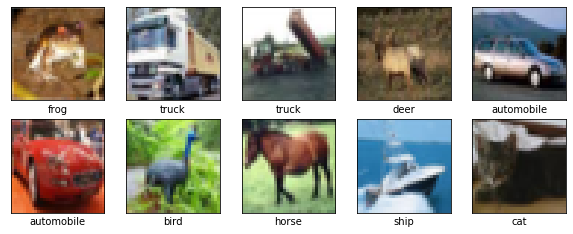

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.5205 - accuracy: 0.4475
Epoch 2/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.1473 - accuracy: 0.5939
Epoch 3/20
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.9921 - accuracy: 0.6523
Epoch 4/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.8967 - accuracy: 0.6875
Epoch 5/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.8233 - accuracy: 0.7120
Epoch 6/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.7659 - accuracy: 0.7316
Epoch 7/20
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.7185 - accuracy: 0.7489
Epoch 8/20
50000/50000 [==============================] - 63s 1ms/sample - loss: 0.6750 - accuracy: 0.7649
Epoch 9/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.6394 - accuracy: 0.7752
Epoch 10/20
50

50000/50000 [==============================] - 21s 423us/sample - loss: 0.2812 - accuracy: 0.9012


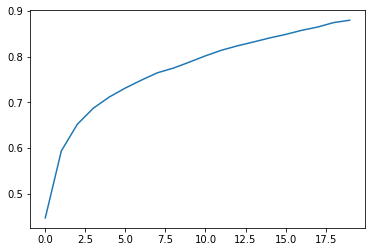

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
test_acc = model.evaluate(train_images,  train_labels)

In [0]:
print(test_acc[1])

0.90118
